In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
     
     number1: int
     operation: str
     number2: int
     finalNumber: int

In [3]:
def op_add(state: AgentState) -> AgentState:

    state['finalNumber'] = state['number1'] + state['number2']
    return state


def op_substract(state: AgentState) -> AgentState:

    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    if state['operation'] == '+':
        return "addition_operation"
    elif state['operation'] == '-':
        return "substraction_operation"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node", op_add)
graph.add_node("substract_node", op_substract)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,

    {
        # Edge: Node
        "addition_operation": "add_node",
        "substraction_operation": "substract_node"
    }
)


graph.add_edge("add_node", END)
graph.add_edge("substract_node", END)

app = graph.compile()

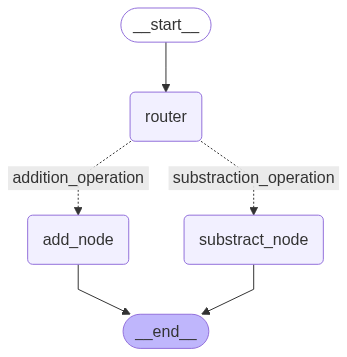

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state_1 = AgentState(number1=10, operation="-", number2=5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


In [9]:
result = app.invoke({'number1': 121, 'operation': '-', 'number2': 23})
print(result)

{'number1': 121, 'operation': '-', 'number2': 23, 'finalNumber': 98}
